In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [2]:
df = pd.read_csv("titanic.csv")
df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [3]:
df.describe()





,pclass,survived,sibsp,parch
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.498854,0.385027
std,0.837836,0.486055,1.041658,0.865560
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000
max,3.000000,1.000000,8.000000,9.000000


In [4]:
df = df.dropna(subset=["age"])


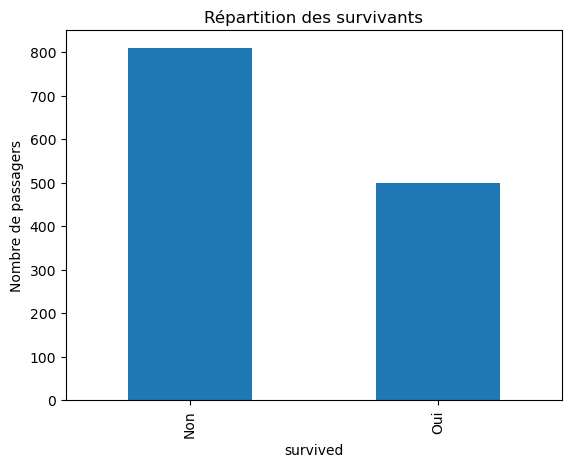

survived
0    61.802903
1    38.197097
Name: proportion, dtype: float64


In [5]:
df['survived'].value_counts().plot(kind="bar")
plt.title("Répartition des survivants")
plt.xticks([0, 1], ["Non", "Oui"])
plt.ylabel("Nombre de passagers")
plt.show()

pourcentage_survie = df['survived'].value_counts(normalize=True) * 100
print(pourcentage_survie)


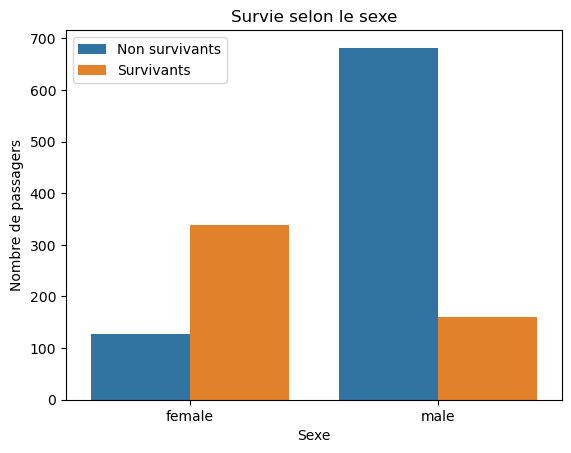

sex
female    72.746781
male      19.098458
Name: survived, dtype: float64


In [6]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survie selon le sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre de passagers")
plt.legend(["Non survivants", "Survivants"])
plt.show()

pourcentage_survie_par_sexe = df.groupby('sex')['survived'].mean() * 100
print(pourcentage_survie_par_sexe)

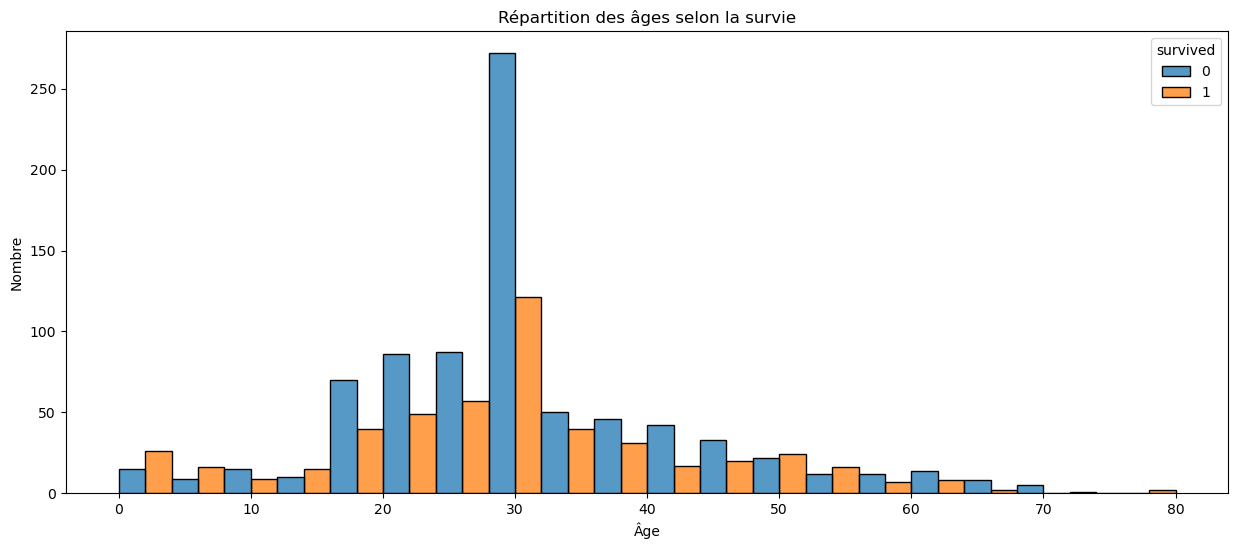

In [12]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'] = df['age'].fillna(df['age'].mean())
df['age'] = df['age'].round().astype(int)
df = df.dropna(subset=['age'])
plt.figure(figsize=(15, 6)) 
sns.histplot(data=df, x="age", hue="survived", bins=20, kde=False, multiple="dodge")
plt.title("Répartition des âges selon la survie")
plt.xlabel("Âge")
plt.ylabel("Nombre")
plt.show()



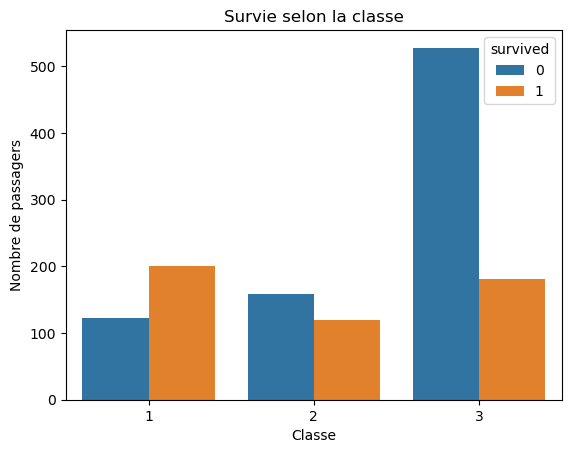

In [8]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survie selon la classe")
plt.xlabel("Classe")
plt.ylabel("Nombre de passagers")
plt.show()

In [9]:
nb_hommes = df[df['sex'] == 'male'].shape[0]
nb_femmes = df[df['sex'] == 'female'].shape[0]

nb_total = nb_hommes + nb_femmes

print("Nombre de passagers hommes :", nb_hommes)
print("Nombre de passagers femmes :", nb_femmes)
print("Nombre de passagers total de passagers :", nb_total)


Nombre de passagers hommes : 843
Nombre de passagers femmes : 466
Nombre de passagers total de passagers : 1309


In [15]:

# Nombre total et survivants > 50 ans
total_50_plus = df[df['age'] > 50].shape[0]
survived_50_plus = df[(df['age'] > 50) & (df['survived'] == 1)].shape[0]
taux_survie_50_plus = survived_50_plus / total_50_plus * 100

print(f"Nombre total > 50 ans : {total_50_plus}")
print(f"Nombre survivants > 50 ans : {survived_50_plus}")
print(f"Taux de survie > 50 ans : {taux_survie_50_plus:.2f}%")

# Distribution par classe pour > 50 ans
print(df[df['age'] > 50]['pclass'].value_counts())



Nombre total > 50 ans : 95
Nombre survivants > 50 ans : 38
Taux de survie > 50 ans : 40.00%
pclass
1    64
2    20
3    11
Name: count, dtype: int64
